In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#reading csv file named 'car data'
car_df=pd.read_csv('car data.csv')
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_df.shape

(301, 9)

In [4]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
car_df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [6]:
car_df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [7]:
car_df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [8]:
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_df.replace({'Transmission':{'Manual':0,'Automatic':1,}},inplace=True)

C:\Users\ACER\AppData\Local\Temp\ipykernel_9520\877361082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9520\877361082.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_9520\877361082.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

In [9]:
#renaming 'year' column to 'age' 
car_df.rename(columns={'Year':'Age'}, inplace= True)

In [10]:
car_df['Age']= 2023 - car_df['Age']
car_df.head()

,Car_Name,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,9,3.35,5.59,27000,0,0,0,0
1,sx4,10,4.75,9.54,43000,1,0,0,0
2,ciaz,6,7.25,9.85,6900,0,0,0,0
3,wagon r,12,2.85,4.15,5200,0,0,0,0
4,swift,9,4.60,6.87,42450,1,0,0,0


Text(0.5, 1.0, 'Variation of present price with Age')

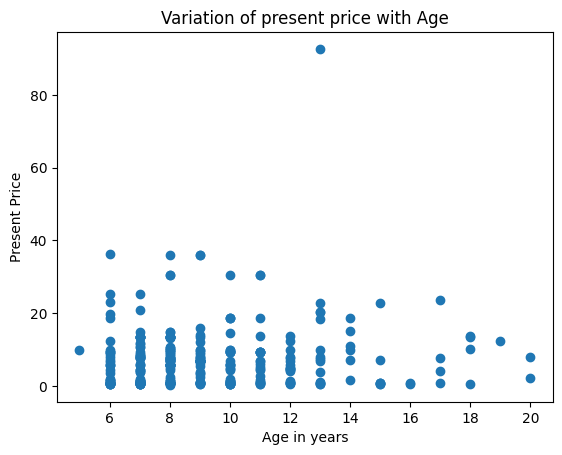

In [11]:
plt.scatter(car_df['Age'],car_df['Present_Price'])
plt.xlabel('Age in years')
plt.ylabel('Present Price')
plt.title('Variation of present price with Age')

In [12]:
X=car_df.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_df['Selling_Price']
print(X)
print(Y)

     Age  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0      9           5.59       27000          0            0             0   
1     10           9.54       43000          1            0             0   
2      6           9.85        6900          0            0             0   
3     12           4.15        5200          0            0             0   
4      9           6.87       42450          1            0             0   
..   ...            ...         ...        ...          ...           ...   
296    7          11.60       33988          1            0             0   
297    8           5.90       60000          0            0             0   
298   14          11.00       87934          0            0             0   
299    6          12.50        9000          1            0             0   
300    7           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0  
4        0

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [14]:
#Linear Regression
lin_reg_model=LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
predict_model=lin_reg_model.predict(X_train)

Text(0.5, 1.0, 'Actual vs Predicted Prices')

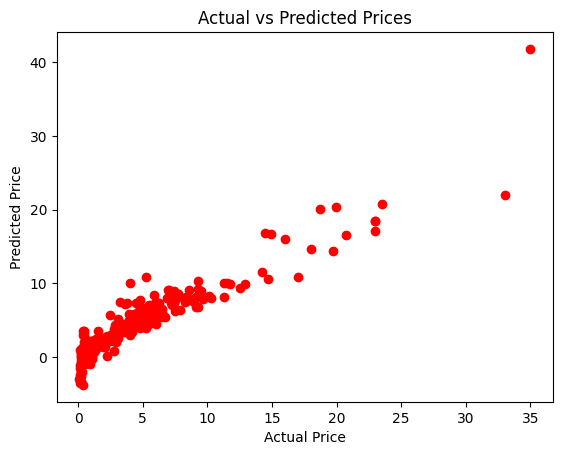

In [17]:
plt.scatter(Y_train,predict_model,c='r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")

In [18]:
test_model=lin_reg_model.predict(X_test)

Text(0, 0.5, 'Predicted Prices')

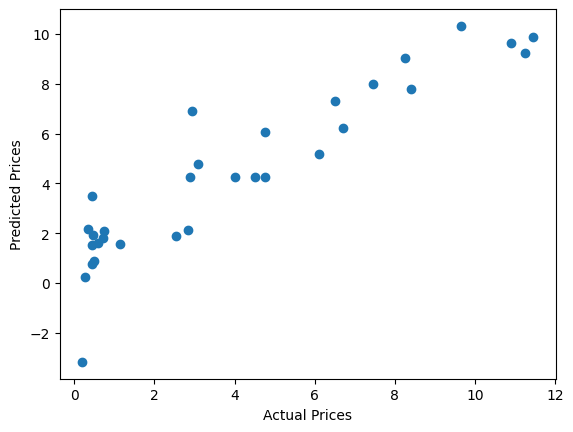

In [19]:
plt.scatter(Y_test,test_model)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")


In [20]:
#Giving own inputs to check the accuracy of the model
xyz=np.array([[7,11.60,33988,1,0,0,0]]) 
test_model1=lin_reg_model.predict(xyz)

C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print("Prediction: {}".format(test_model1)) #The acutal value is 9.5

Prediction: [9.01067339]



Therefore, the accuracy of this model is 94.85%

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [23]:
mae=mean_absolute_error(Y_test,test_model)
r2=r2_score(Y_test,test_model)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 1.151638215662344
R2 Score: 0.8365766715024715


## Lasso Regression

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,Y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)


Mean Absolute Error: 1.0507413774170475
R2 Score: 0.8709167941173173


## Ridge Regression

In [27]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,Y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 1.1430615313476469
R2 Score: 0.8400976059753142


## ElasticNet

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,Y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(Y_test,y_pred)
r2=r2_score(Y_test,y_pred)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)

Mean Absolute Error: 1.0506154674464132
R2 Score: 0.869508419959699
